### How TDs and Senators plan to vote on Repealing the 8th amendment.
* __Author:__ @F_Delahunty
* __Date:__ 14/02/2018

__Using this notebook:__
* Dataset can be found in the same github folder as this notebook, you're also welcome to pull your data (notes below).
* Exporting data from twitter is legal under their private policy, however we _shouldn't_ forgot that we're still dealing with people personal thougths and views on issues. Therefore I would ask you to follow [Ten simple rules for responsible big data research
](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005399) and be aware of the effects of your work. 


We start by importing all the required libraries

In [1]:
import seaborn as  sns
import matplotlib as plt
import datetime
import pandas as pd


%matplotlib inline

### 1) Data import
I used [Jefferson-Henrique GetOldTweets-python
](https://github.com/Jefferson-Henrique/GetOldTweets-python) work to pull the tweets I needed from the #solidariTEA. If you want to just play with the existing data choose option 1 and import my dataset, if you want to download tweets yourself choose option 2 

__Note only run one or the two options!__


__Option 1:__

In [13]:
data = pd.read_csv('#solidariTEA_1.0.csv',sep='\t')

In [14]:
data.head()

,Unnamed: 0,Username,Text,mentions,retweets,hastags,geo,favorites,date,month,day,hour
0,0,NaN,Raising a giant cup in support for a truly ama...,NaN,1,#solidariTEA,NaN,3,2017-12-07 23:21:08,12,7,23
1,0,NaN,@NUIGsolidariTEA @MichelineShSk this makes it ...,@NUIGsolidariTEA @MichelineShSk,3,#solidariTEA,NaN,2,2017-12-07 23:19:57,12,7,23
2,0,NaN,Fantastic #solidariTEA well done all @NUIGsoli...,@NUIGsolidariTEA,5,#solidariTEA,NaN,6,2017-12-07 22:59:28,12,7,22
3,0,NaN,I’m a bit late as didn’t have WiFi in the univ...,NaN,8,#SolidariTea,NaN,17,2017-12-07 22:50:54,12,7,22
4,0,NaN,Is this Hong Kong?? That's four continents sup...,@NUIGsolidariTEA @FemSocNUIG @NUIGSU,3,#solidariTEA,NaN,14,2017-12-07 22:34:19,12,7,22


__ Option 2:__
* Start by forking [Jefferson-Henrique GetOldTweets-python
](https://github.com/Jefferson-Henrique/GetOldTweets-python)
* Set this notebook, or your new .py file into the root folder. 
* If you're running python 3+ run the from "got3 import manager", otherwise use "from got import manager"
* Read the docs on Jefferson repo

__Steps__

1. The first cell here imports the data from twitter. 
2. Our second cell creates a function which converts the tweet manager output (List format) into a dataframe
3. Our third cell calls this function and applies it to the list

In [2]:
from got3 import manager

tweetCriteria = manager.TweetCriteria().setQuerySearch('#solidariTEA').setSince("2017-12-06").setUntil("2017-12-08").setMaxTweets(800)
tweet = manager.TweetManager.getTweets(tweetCriteria)

In [4]:
def dataframe(tweet):
    data = pd.DataFrame(columns=['Username', 'Text', 'mentions','retweets','hastags','geo','favorites','date','month','day','hour' ])
    Columns = ['Username', 'Text', 'mentions','retweets','hastags','geo','favorites','date','month','day','hour' ]
    for t in tweet: 
        username = t.username
        text = t.text
        mentions = t.mentions
        retweets = t.retweets
        hastags = t.hashtags
        date = t.date
        geo = t.geo
        favorites = t.favorites
        month = t.date.month
        day =  t.date.day
        hour  = t.date.hour
       
        Row = [username,text,mentions,retweets,hastags,geo,favorites,date,month,day,hour]
        data = data.append(pd.DataFrame([Row], columns=Columns))
    return(data)    

In [5]:
data = dataframe(tweet)

In [6]:
data.head()

,Username,Text,mentions,retweets,hastags,geo,favorites,date,month,day,hour
0,,Raising a giant cup in support for a truly ama...,,1,#solidariTEA,,3,2017-12-07 23:21:08,12,7,23
0,,@NUIGsolidariTEA @MichelineShSk this makes it ...,@NUIGsolidariTEA @MichelineShSk,3,#solidariTEA,,2,2017-12-07 23:19:57,12,7,23
0,,Fantastic #solidariTEA well done all @NUIGsoli...,@NUIGsolidariTEA,5,#solidariTEA,,6,2017-12-07 22:59:28,12,7,22
0,,I’m a bit late as didn’t have WiFi in the univ...,,8,#SolidariTea,,17,2017-12-07 22:50:54,12,7,22
0,,Is this Hong Kong?? That's four continents sup...,@NUIGsolidariTEA @FemSocNUIG @NUIGSU,3,#solidariTEA,,14,2017-12-07 22:34:19,12,7,22


### 2) Data analysis
We start by plotting a time frequency table

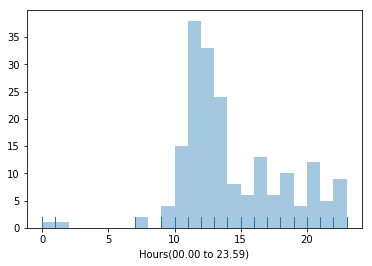

In [15]:
hour = data['hour'].tolist()
myplot = sns.distplot(hour, bins=23, kde=False, rug=True,axlabel='Hours(00.00 to 23.59)')


ValueError: color kwarg must have one color per dataset

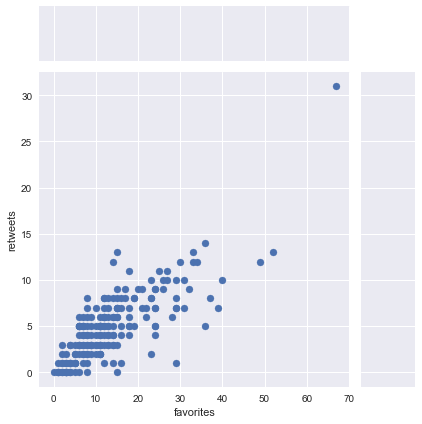

In [143]:
sns.jointplot(x='favorites', y='retweets', data=data)

In [16]:
Total_Retweets = data['retweets'].sum()
Total_favorites = data['favorites'].sum()
print ('Total retweets:', Total_Retweets)
print ('Total favorites:', Total_favorites)

Total retweets: 961
Total favorites: 2684


In [28]:
data.max()

Username                                                      
Text         virtual herbal tea from me in support of #soli...
mentions      @ucddublin @nuigalway @NUIGsolidariTEA @CGFS_UCD
retweets                                                    31
hastags                                           #solidaritea
date                                       2017-12-07 23:21:08
geo                                                           
favorites                                                   67
dtype: object

In [15]:
Max_Tweet = data.max()
print(Max_Tweet['Text'])
print(Max_Tweet['retweets'])
print(Max_Tweet['favorites'])

virtual herbal tea from me in support of #solidariTEA https:// twitter.com/enortee/status /938712189367672833 …
31
67


In [147]:
data.Text.str.split(expand=True).stack().value_counts()

#solidariTEA                  168
in                            103
@NUIGsolidariTEA               95
to                             86
and                            80
the                            71
for                            69
a                              62
support                        54
with                           48
of                             44
…                              44
https://                       41
@nuigalway                     39
from                           38
at                             37
colleagues                     32
gender                         30
our                            26
cup                            23
women                          22
discrimination                 19
this                           19
my                             18
I                              16
is                             15
#SolidariTEA                   15
morning                        15
coffee                         15
equality      

In [34]:
data.mentions.str.split(expand=True).stack().value_counts()

@NUIGsolidariTEA    95
@nuigalway          39
@kellycoate          6
@FemSocNUIG          5
@MichelineShSk       5
@aliceeire           4
@Afshin_Samali       4
@ivanabacik          3
@folieadeuxed        3
@gcs_ul              3
@NUIGSU              3
@stritchj            3
@AppSocScs_LIT       3
@CGFS_UCD            3
@lisascottpsych      3
@NUIGLaw             2
@ucddublin           2
@tcddublin           2
@lorrainetansey      2
@KingsCollegeLon     2
@LimerickIT          2
@FionaWalsh14        2
@IrishLimericker     2
@KEnglishLab         2
@EdinburghUni        2
@cathmartingreen     2
@HPRC_NUIG           2
@nuigsolidariTEA     2
@DurhamLawSchool     2
@sarahcantthink      1
                    ..
@nagemtweets         1
@IrishCancerSoc      1
@AoifePTweet         1
@EU_H2020            1
@DrMattCannon        1
@NUIsolidariTEA      1
@JanOSullivanTD      1
@RubenM_Oficial      1
@hrbireland          1
@Niamh_NicGhabh      1
@WISPS_UK            1
@aoifelen            1
@GrainneWal

In [37]:
data.hastags.str.split(expand=True).stack().value_counts()

#solidariTEA             168
#SolidariTEA              15
#genderdiscrimination     13
#genderequality            8
#NUIG                      4
#solidariTea               4
#solidaritea               3
#HE                        2
#kingscollegelondon        2
#Solidaridad               2
#genderstudies             1
#HigherEducation           1
#AlcaladeHenares           1
#Navidad                   1
#solidarity                1
#feminism                  1
#sspp                      1
#Alcala                    1
#Oireachtas                1
#impact                    1
#Cardiff                   1
#womeninhighered           1
#WomenInAcademia           1
#Education                 1
#solidaritTEA              1
#HigherEd                  1
#music                     1
#manup                     1
#feminist                  1
#WomenInScience            1
#LeinsterHouse             1
#SRHE2017                  1
#equalitystudies           1
#NUIG4                     1
#Chile        

In [5]:
for t in tweet:
    print("Username: %s" % t.username)
    print("Text: %s" % t.text)
    print("Mentions: %s" % t.mentions)
    print("Retweets: %s" % t.retweets)
    pr#
    int("Hashtags: %s\n" % t.hashtags)
    print("Date: %s\n" % t.date)
    print("Geo: %s\n" % t.geo)
    print("Favorites: %s\n" % t.favorites)
    print('          ')

Username: 
Text: Raising a giant cup in support for a truly amazing PhD supervisor Dr Margaret Hodgins and colleagues #solidariTEA pic.twitter.com/nulsgCCvyG
Mentions: 
Retweets: 1
Hashtags: #solidariTEA

Date: 2017-12-07 23:21:08

Geo: 

Favorites: 3

          
Username: 
Text: @NUIGsolidariTEA @MichelineShSk this makes it four continents supporting #solidariTEA thanks for the support for our colleagues. https:// twitter.com/orlamccormack3 0/status/938888572651712512 …
Mentions: @NUIGsolidariTEA @MichelineShSk
Retweets: 3
Hashtags: #solidariTEA

Date: 2017-12-07 23:19:57

Geo: 

Favorites: 2

          
Username: 
Text: Fantastic #solidariTEA well done all @NUIGsolidariTEA We are all in support of you and inspired by you! Keep strong https:// twitter.com/michelineshsk/ status/938854122027147266 …
Mentions: @NUIGsolidariTEA
Retweets: 5
Hashtags: #solidariTEA

Date: 2017-12-07 22:59:28

Geo: 

Favorites: 6

          
Username: 
Text: I’m a bit late as didn’t have WiFi in the universit